# Bifurications

## Transcritical bifurcation

### The Allee effect

$$X' = 0.1X\left(1 - \frac{X}{k}\right)\left(\frac{X}{a}-1\right)$$
k = 1000 en a variabel, equilibriumlijnen van dit model + stabiliteit:

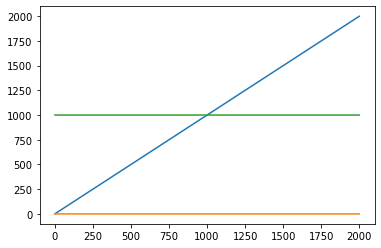

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
a_array = np.arange(1,2000,1)
plt.plot(a_array,a_array)
plt.plot(a_array,np.zeros(len(a_array)))
plt.plot(a_array,np.ones(len(a_array))*1000)
plt.show()

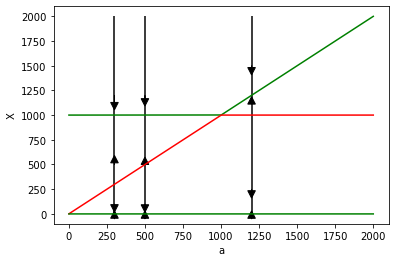

In [75]:
def verandering(X,a): return 0.1*X*(1 - X/1000)*(X/a - 1)
def stabiel(X_init,a):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(100):
        X += tijdsinterval*verandering(X,a)
    return abs(X-X_init) <= perturbatie
stabielx = []
stabiely = []
onstabielx = []
onstabiely = []
nulx_stabiel = []
nuly_stabiel = []
nulx_onstabiel = []
nuly_onstabiel = []
for a in a_array:
    if stabiel(a,a):
        stabielx.append(a)
        stabiely.append(a)
    else:
        onstabielx.append(a)
        onstabiely.append(a)
        
    if stabiel(1000,a):
        stabielx.append(a)
        stabiely.append(1000)
    else:
        onstabielx.append(a)
        onstabiely.append(1000)
            
    if stabiel(0,a):
        nulx_stabiel.append(a)
        nuly_stabiel.append(0)
    else:
        nulx_onstabiel.append(a)
        nuly_onstabiel.append(0)
        
plt.plot(stabielx,stabiely,color='g')
plt.plot(onstabielx,onstabiely,color='r')
plt.plot(nulx_stabiel,nuly_stabiel,color='g')
plt.plot(nulx_onstabiel,nuly_onstabiel,color='r')
plt.xlabel('a')
plt.ylabel('X')

#nu nog de pijlkes:
def pijlen(a,X,breedte = 50,lengte = 75):
    plt.vlines(a,0,2000,color='black')
    for x in X:
        wijst_naar = verandering(x,a)
        plt.arrow(a,x,0,wijst_naar,head_width=breedte,head_length=lengte,color='black')
pijlen(300,[-50,100,500,1200])
pijlen(500,[-50,100,500,1200])
pijlen(1200,[-50,250,1110,1500])
plt.show()

## Saddle-node bifurcation

### The lac Operon

Beschouw het volgende model:
$$X' = \frac{a+X^2}{1+X^2} - rX$$
Met a = 0.006, we laten r variëren en lossen deze vergelijking in exact dezelfde manier als hierboven op. 
Zullen we beginnen met r te berekenen aan de hand van X' = 0:

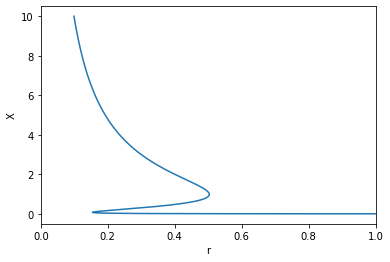

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0.001,10,2000) #2000 nummers van 0 tot 10 array
R = (1/X)*(0.006+X**2)/(1+X**2) #je kan bewerkingen uitvoeren op heel de array ipv element per element (dat is de power van arrays)
plt.plot(R,X)
plt.xlim(0,1)
plt.xlabel('r')
plt.ylabel('X')
plt.show()

Nu net als het vorige de stabiliteiten, maar dan met scatter aangezien de specifieke gebieden niet naar ons weten niet per se verbonden zijn:

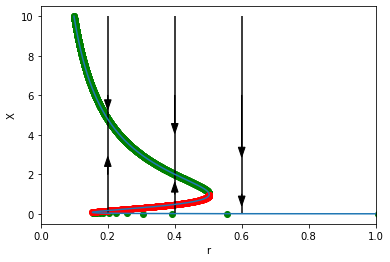

In [22]:
def verandering(X,r): return (0.006+X**2)/(1+X**2)-r*X
def stabiel(X_init,a):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(100):
        X += tijdsinterval*verandering(X,a)
    return abs(X-X_init) <= perturbatie
stabielx = []
stabiely = []
onstabielx = []
onstabiely = []
for i in range(2000):
    if stabiel(X[i],R[i]):
        stabielx.append(R[i])
        stabiely.append(X[i])
    else:
        onstabielx.append(R[i])
        onstabiely.append(X[i])
plt.scatter(stabielx,stabiely,color='g')
plt.scatter(onstabielx,onstabiely,color='r')
plt.plot(R,X)
plt.xlim(0,1)
plt.xlabel('r')
plt.ylabel('X')

#nu nog de pijlkes:
def pijlen(r,X,breedte = 0.02,lengte = 0.5):
    plt.vlines(r,0,10,color='black')
    for x in X:
        wijst_naar = verandering(x,r)
        plt.arrow(r,x,0,wijst_naar,head_width=breedte,head_length=lengte,color='black')
pijlen(0.2,[2,6])
pijlen(0.4,[1,6])
pijlen(0.6,[1,6])

plt.show()

### The spruce Budworm

Dit is een rups uit het noordoosten van de verenigde staten, typisch in lage nummers aanwezig maar soms stijgt de populatie drastisch. Dit zorgt voor een overconsumptie van de bladeren. Waarom gebeurt dit?
De vergelijking van de populatie knopwormen wordt gegeven door:

$$X' = rX\left(1-\frac{X}{k}\right) - \frac{X^2}{1+X^2}$$

We zullen eerst voor elk paar (k,r) het aantal equilibria weergeven met solve van sympy (0 is duidelijk ook een equilibrium en deze wordt er achteraf bijgeteld):

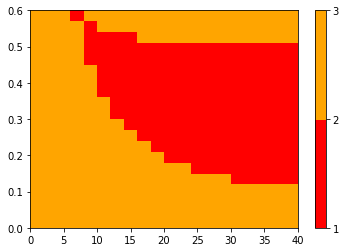

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sympy.solvers import solve
from sympy import Symbol
from IPython.display import display, Math

R_aantal = 20
K_aantal = 20
R = np.linspace(0,0.6,R_aantal) #20 nummers van 0 tot 1 array
K = np.linspace(0,40,K_aantal)
matrix = []
def aantal_evenwichten(R,K):
    X = Symbol('X',real=True) #skip imaginaire bois
    rij = np.zeros(K_aantal)
    equilibria = np.zeros(R_aantal)
    for r in range(R_aantal):
        for k in range(K_aantal):
            rij[k] = len(solve(R[r]*(1-X/K[k]) - X/(1+X**2),X)) +1
        matrix.append(rij)
        rij = np.zeros(K_aantal)
    return matrix

#dit is een definitie die de matrix kan printen in latex matrixvorm
def print_matrix(array):
    data = ''
    for line in array:        
        if len(line) == 1:
            data += ' %.3f &'%line + r' \\\n'
            continue
        for element in line:
            data += ' %.3f &'%element
        data += r' \\' + '\n'
    display(Math('\\begin{bmatrix} \n%s\end{bmatrix}'%data))

#colormap
cmap = colors.ListedColormap(['red', 'orange'])
bounds=[1,2,3]
extent = [0 , 40, 0 , 0.6]
norm = colors.BoundaryNorm(bounds, cmap.N)

afbeelding = plt.imshow(aantal_evenwichten(R,K),interpolation='nearest',origin='lower',cmap=cmap,norm=norm,extent=extent,aspect='auto') 
#extent = [x_min , x_max, y_min , y_max]
#zonder aspect='auto' plot die een 40x1 breede balk

# make a color bar
plt.colorbar(afbeelding,boundaries=bounds, ticks=[1,2,3])

plt.show()



Nu zullen we elk equilibrium testen of ze stabiel of onstabiel is, waarbij we in ons 3D plot ze groen doen als stabiel en rood als onstabiel:

<IPython.core.display.Javascript object>


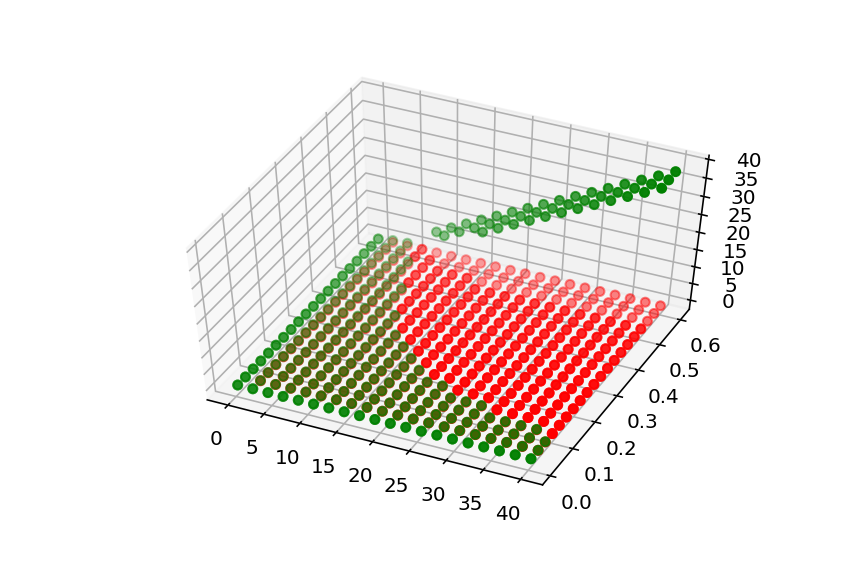

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from sympy.solvers import solve
from sympy import Symbol
from IPython.display import display, Math

R_aantal = 20
K_aantal = 20
R = np.linspace(0.01,0.6,R_aantal) #20 nummers van 0 tot 0.6 array
K = np.linspace(0.01,40,K_aantal)

def verandering(X,k,r): return r*X*(1 - X/k) - (X**2)/(1 + X**2)

def stabiel(X_init,k,r):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(100):
        X += tijdsinterval*verandering(X,k,r)
    return abs(X-X_init) <= perturbatie

def evenwichten_in_3D(R,K):
    X = Symbol('X',real=True) #skip imaginaire bois
    stabielepunten= [[],[],[]]
    instabielepunten = [[],[],[]]
    for r in R:
        for k in K:
            equilibria = np.zeros(2)
            X_waarde = solve(r*(1-X/k) - X/(1+X**2),X)
            if X_waarde != []:
                equilibria[1] = X_waarde[0]
            for x in equilibria:
                if stabiel(x,k,r):
                    stabielepunten[0].append(k)
                    stabielepunten[1].append(r)
                    stabielepunten[2].append(x)
                else:
                    instabielepunten[0].append(k)
                    instabielepunten[1].append(r)
                    instabielepunten[2].append(x)
                    
    return stabielepunten,instabielepunten

stabielepunten,instabielepunten = evenwichten_in_3D(R,K)

ax = plt.axes(projection ="3d")

ax.scatter(stabielepunten[0],stabielepunten[1],stabielepunten[2],color='g')
ax.scatter(instabielepunten[0],instabielepunten[1],instabielepunten[2],color='r')

plt.show()

### Pitchfork bifurcation

We zullen nu het 'opinie model' van p. 166:
$$X' = (1-X)ve^{aX} - (1+X)ve^{-aX}$$
analyseren met voor het gemak v = 1:

Eerst en vooral zullen we trachten de vergelijking op te lossen voor a = 1.3 met sympy:

In [155]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
from sympy import exp

a = 1.3
X = Symbol('X')
oplossing_X = solve((1 - X)*exp(a*X) - (1 + X)*exp(-a*X),X)
print(oplossing_X)

NotImplementedError: multiple generators [X, exp(X/5)]
No algorithms are implemented to solve equation (1 - X)*exp(13*X/10) - (X + 1)*exp(-13*X/10)

We zien dat dit niet gaat, alternatief kunnen we de equilibria bepalen door op te delen over domeinen en optimalisatie van sympy:

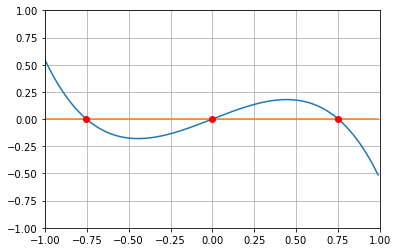

De nulpunten zijn  -0.752057636655631  ,  0.0  en  0.752057636655631


In [137]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import exp

a = 1.3
x = np.arange(-1,1,0.01)
def verandering(X,a): return ((1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X))

plt.xlim(-1,1)
plt.ylim(-1,1)
waarden = verandering(x,a)
zeros = np.zeros(len(x))
plt.grid()
plt.plot(x,waarden)
plt.plot(x,zeros)

#snijpunten vinden:
import scipy.optimize as opt
nulpunten = np.zeros(3)
nulpunten[0] = opt.brentq(lambda X: (1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X), -1,-0.5)
nulpunten[1] = opt.brentq(lambda X: (1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X), -0.5,0.5)
nulpunten[2] = opt.brentq(lambda X: (1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X), 0.5,1)
idx = np.argwhere(np.diff(np.sign(waarden - 0))).flatten() #Dit is hier niet relevant maar bepaalt de indices van de nulpunten

plt.plot(nulpunten, verandering(nulpunten,a), 'ro')
plt.show()
print("De nulpunten zijn ",nulpunten[0]," , ",nulpunten[1], " en ",nulpunten[2])

we hebben dus dat 
$$X_{stabiel} \approx \pm0.75$$

We kunnen nu de bifuricatiediagram opstellen:

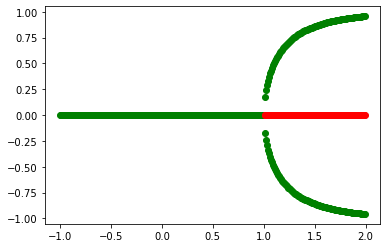

In [213]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

def verandering(X,a): return ((1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X))

def stabiel(X_init,a):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(50):
        X += tijdsinterval*verandering(X,a)
    return abs(X-X_init) <= perturbatie

def function(X,a): return lambda X: (1 - X)*np.exp(a*X) - (1 + X)*np.exp(-a*X)

def bifurication(a_waarden=np.arange(-1,2,0.01),x_waarden=np.arange(-1,1,0.01)):
    finale_x_s = []
    finale_y_s = []
    finale_x_i = []
    finale_y_i = []
    for a in a_waarden:
        waarden = verandering(x_waarden,a)
        lijst = []
        for i in range(len(waarden) -1):
            if (waarden[i] <= 0 and waarden[i+1] >= 0) or (waarden[i] >= 0 and waarden[i+1] <= 0):
                lijst.append(x_waarden[i+1])
        #nulpunten vinden:
        nulpunten = np.zeros(len(lijst))
        for i in range(len(lijst)):
            nulpunten[i] = opt.brentq(function(X,a), lijst[i] - 0.02, lijst[i] + 0.02)
            #0.01 is de spatiëring tussen 2 punten met verschillend teken -> 0.02 zeker mee
        for nulpunt in nulpunten:
            if stabiel(nulpunt,a):
                finale_x_s.append(a)
                finale_y_s.append(nulpunt)
            else:
                finale_x_i.append(a)
                finale_y_i.append(nulpunt)
    return finale_x_s,finale_y_s,finale_x_i,finale_y_i

finale_x_s,finale_y_s,finale_x_i,finale_y_i = bifurication()

plt.scatter(finale_x_s,finale_y_s,color = 'g')
plt.scatter(finale_x_i,finale_y_i,color = 'r')
plt.show()

## Some extra exercises to practice

### One parameter

We bekijken de bifuricatiediagrammen van de volgende differentiaalvergelijkingen:

$$X′ = rX+X^3−X^5$$

$$X′ = rX+X^2−X^3$$

$$X′ = rX−\frac{X}{1+X^2}$$

$$X′ =X−r+\frac{2-X}{1+X^2}$$

In [260]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import scipy.optimize as opt

X = Symbol('X')

def stabiel(X_init,a):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(50):
        X += tijdsinterval*verandering(X,a)
    return abs(X-X_init) <= perturbatie

def bifurication(r_waarden=np.arange(-1,2,0.01),x_waarden=np.arange(-1,1,0.01)):
    finale_x_s = []
    finale_y_s = []
    finale_x_i = []
    finale_y_i = []
    for r in r_waarden:
        waarden = verandering(x_waarden,r)
        lijst = []
        for i in range(len(waarden) -1):
            if (waarden[i] <= 0 and waarden[i+1] >= 0) or (waarden[i] >= 0 and waarden[i+1] <= 0):#lage precisie nulpunt vinden
                lijst.append(x_waarden[i+1])
        #nulpunten vinden:
        nulpunten = np.zeros(len(lijst))
        for i in range(len(lijst)):
            if np.sign(verandering((lijst[i] - 0.02),r)) != np.sign(verandering((lijst[i] + 0.02),r)): #cases als -X^2 vermijden met zelfde teken langs beide kanten
                nulpunten[i] = opt.brentq(function(X,r), lijst[i] - 0.02, lijst[i] + 0.02) #hoge precisie nulpunt vinden
            else:
                nulpunten[i] = lijst[i]
            #0.01 is de spatiëring tussen 2 punten met verschillend teken -> 0.02 zeker mee
        for nulpunt in nulpunten:
            if stabiel(nulpunt,r):
                finale_x_s.append(r)
                finale_y_s.append(nulpunt)
            else:
                finale_x_i.append(r)
                finale_y_i.append(nulpunt)
    return finale_x_s,finale_y_s,finale_x_i,finale_y_i

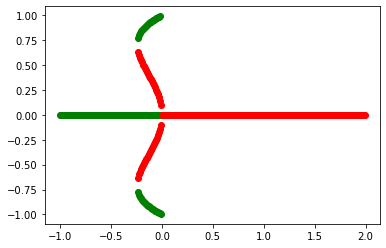

In [261]:
def function(X,r): return lambda X: r*X + X**3 - X**5

def verandering(X,r): return (r*X + X**3 - X**5)

finale_x_s,finale_y_s,finale_x_i,finale_y_i = bifurication()

plt.scatter(finale_x_s,finale_y_s,color = 'g')
plt.scatter(finale_x_i,finale_y_i,color = 'r')
plt.show()

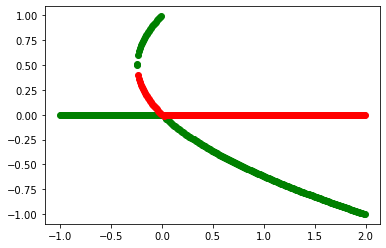

In [265]:
def function(X,r): return lambda X: r*X + X**2 - X**3

def verandering(X,r): return (r*X + X**2 - X**3)

finale_x_s,finale_y_s,finale_x_i,finale_y_i = bifurication()

plt.scatter(finale_x_s,finale_y_s,color = 'g')
plt.scatter(finale_x_i,finale_y_i,color = 'r')
plt.show()

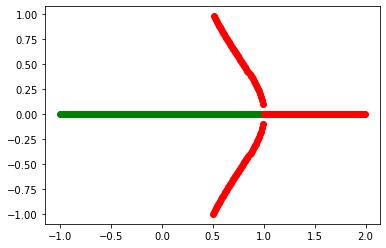

In [263]:
def function(X,r): return lambda X: r*X - X/(1+X**2)

def verandering(X,r): return (r*X - X/(1+X**2))

finale_x_s,finale_y_s,finale_x_i,finale_y_i = bifurication()

plt.scatter(finale_x_s,finale_y_s,color = 'g')
plt.scatter(finale_x_i,finale_y_i,color = 'r')
plt.show()

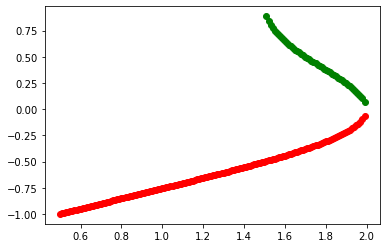

In [264]:
def function(X,r): return lambda X: X - r + (2 - X)/(1+X**2)

def verandering(X,r): return (X - r + (2 - X)/(1+X**2))

finale_x_s,finale_y_s,finale_x_i,finale_y_i = bifurication(np.arange(-1,2,0.01),np.arange(-1,1,0.01))

plt.scatter(finale_x_s,finale_y_s,color = 'g')
plt.scatter(finale_x_i,finale_y_i,color = 'r')
plt.show()

### Two parameters

Beschouw nu het volgende model van de vispopulatie:

$$N' = rN(1 - \frac{N}{K}) - H\frac{N}{A+N}$$

waar A ≤ K en A,K,r,H > 0. Hierbij is de eerste term de logistische groei en de tweede term hoe snel de vissen worden verwijdert door vissen, deze term is niet lineair, iemand kan minder vis vangen wanneer er minder vis in de vijver zit.

Je kan makkelijk aantonen door invullen dat dit als volgt kan geschreven worden:

$$\frac{dx}{d\tau} = x(1-x) - h\frac{x}{a+x}$$

met 

$$x=\frac{N}{K},\tau = rt,a = \frac{A}{K} \text{ en } h=\frac{H}{rK}$$

$$\left(\frac{N'}{rK} = \frac{N}{K}(1-\frac{N}{K})-\frac{H}{rK}\frac{N/K}{A/K + N/K}\right)$$

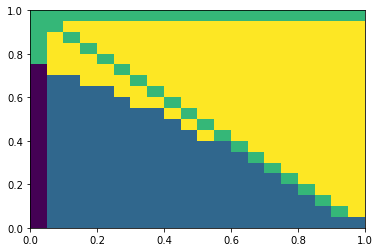

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sympy.solvers import solve
from sympy import Symbol
from IPython.display import display, Math


def aantal_evenwichten(H = np.linspace(0,1,20),A = np.linspace(0,1,20)):
    matrix = []
    X = Symbol('X',real=True) #skip imaginaire bois
    equilibria = np.zeros(h_aantal)
    for h in range(h_aantal):
        rij = np.zeros(a_aantal)
        for a in range(a_aantal):
            rij[a] = len(solve(X*(1-X)-H[h]*X/(A[a]+X),X))
        matrix.append(rij)
    return matrix

#colormap
#cmap = colors.ListedColormap(['red', 'orange'])
#bounds=[1,2,3]
extent = [0 , 1, 0 , 1]
#norm = colors.BoundaryNorm(bounds, cmap.N)
matrix = aantal_evenwichten()
afbeelding = plt.imshow(matrix,extent=extent,aspect='auto') 
#extent = [x_min , x_max, y_min , y_max]
#zonder aspect='auto' plot die een 40x1 breede balk

# make a color bar
#plt.colorbar(afbeelding,boundaries=bounds, ticks=[1,2,3])

def print_matrix(array):
    data = ''
    for line in array:        
        if len(line) == 1:
            data += ' %.3f &'%line + r' \\\n'
            continue
        for element in line:
            data += ' %.3f &'%element
        data += r' \\' + '\n'
    display(Math('\\begin{bmatrix} \n%s\end{bmatrix}'%data))
    
#print_matrix(matrix)
    
plt.show()

Nu nemen we a = [0.1,0.2,...,1] en laten we voor elke waarde van a h variëren via een animatie:

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import math
from sympy.solvers import solve
from sympy import Symbol
import scipy.optimize as opt

X = Symbol('X')


def function(X,h): return lambda X: X*(1-X) - h*X/(a + X)

def verandering(X,h): return (X*(1-X) - h*X/(a + X))

def stabiel(X_init,a):
    perturbatie = 0.01
    tijdsinterval = 0.01
    x = []
    X = X_init + perturbatie
    for i in range(50):
        X += tijdsinterval*verandering(X,a)
    return abs(X-X_init) <= perturbatie

def bifurication(a_waarden=np.arange(0,1,0.1),h_waarden=np.arange(0,1,0.01),x_waarden=np.arange(0,1,0.01)):
    finaal_x_s = []
    finaal_y_s = []
    finaal_x_i = []
    finaal_y_i = []
    for a in a_waarden:
        x_s = []
        y_s = []
        x_i = []
        y_i = []
        for h in h_waarden:
            waarden = verandering(x_waarden,h)
            lijst = []
            for i in range(len(waarden) -1):
                if (waarden[i] <= 0 and waarden[i+1] >= 0) or (waarden[i] >= 0 and waarden[i+1] <= 0):#lage precisie nulpunt vinden
                    lijst.append(x_waarden[i+1])
            #nulpunten vinden:
            nulpunten = np.zeros(len(lijst))
            for i in range(len(lijst)):
                if np.sign(verandering((lijst[i] - 0.02),h)) != np.sign(verandering((lijst[i] + 0.02),h)): #cases als -X^2 vermijden met zelfde teken langs beide kanten
                    nulpunten[i] = opt.brentq(function(X,h), lijst[i] - 0.02, lijst[i] + 0.02) #hoge precisie nulpunt vinden
                else:
                    nulpunten[i] = lijst[i]
                #0.01 is de spatiëring tussen 2 punten met verschillend teken -> 0.02 zeker mee
            for nulpunt in nulpunten:
                if stabiel(nulpunt,h):
                    x_s.append(h)
                    y_s.append(nulpunt)
                else:
                    x_i.append(h)
                    y_i.append(nulpunt)
        finaal_x_s.append(x_s)
        finaal_y_s.append(y_s)
        finaal_x_i.append(x_i)
        finaal_y_i.append(y_i)
    return finaal_x_s,finaal_y_s,finaal_x_i,finaal_y_i

